# Lab | Data Aggregation and Filtering

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by first performing data cleaning, formatting, and structuring.

1. Create a new DataFrame that only includes customers who:
   - have a **low total_claim_amount** (e.g., below $1,000),
   - have a response "Yes" to the last marketing campaign.

2. Using the original Dataframe, analyze:
   - the average `monthly_premium` and/or customer lifetime value by `policy_type` and `gender` for customers who responded "Yes", and
   - compare these insights to `total_claim_amount` patterns, and discuss which segments appear most profitable or low-risk for the company.

3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

4. Find the maximum, minimum, and median customer lifetime value by education level and gender. Write your conclusions.

In [194]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

url = 'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv'
df_original = pd.read_csv(url)

df = df_original.copy()
df.columns


Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [7]:
df_potential_customers = df[(df['Total Claim Amount'] <= 1000)&(df['Response'] == 'Yes')]
df_potential_customers

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
8,8,FM55990,California,5989.773931,Yes,Premium,College,1/19/11,Employed,M,...,0.0,1,Personal Auto,Personal L1,Offer2,Branch,739.200000,Sports Car,Medsize,NaN
15,15,CW49887,California,4626.801093,Yes,Basic,Master,1/16/11,Employed,F,...,0.0,1,Special Auto,Special L1,Offer2,Branch,547.200000,SUV,Medsize,NaN
19,19,NJ54277,California,3746.751625,Yes,Extended,College,2/26/11,Employed,F,...,1.0,1,Personal Auto,Personal L2,Offer2,Call Center,19.575683,Two-Door Car,Large,A
27,27,MQ68407,Oregon,4376.363592,Yes,Premium,Bachelor,2/28/11,Employed,F,...,0.0,1,Personal Auto,Personal L3,Offer2,Agent,60.036683,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10844,10844,FM31768,Arizona,5979.724161,Yes,Extended,High School or Below,2/7/11,Employed,F,...,0.0,3,Personal Auto,Personal L1,Offer2,Agent,547.200000,Four-Door Car,Medsize,NaN
10852,10852,KZ80424,Washington,8382.478392,Yes,Basic,Bachelor,1/27/11,Employed,M,...,0.0,2,Personal Auto,Personal L2,Offer2,Call Center,791.878042,NaN,NaN,A
10872,10872,XT67997,California,5979.724161,Yes,Extended,High School or Below,2/7/11,Employed,F,...,0.0,3,Personal Auto,Personal L3,Offer2,Agent,547.200000,Four-Door Car,Medsize,NaN
10887,10887,BY78730,Oregon,8879.790017,Yes,Basic,High School or Below,2/3/11,Employed,F,...,0.0,7,Special Auto,Special L2,Offer1,Agent,528.200860,SUV,Small,A


In [ ]:
'''
2. Using the original Dataframe, analyze:
   - the average `monthly_premium` and/or customer lifetime value by `policy_type` and `gender` for customers who responded "Yes", and
   - compare these insights to `total_claim_amount` patterns, and discuss which segments appear most profitable or low-risk for the company.
'''
# Segments Corporate Auto&Female and Corporate Auto&M appear most profitable for the company
df_yes = df[df['Response'] == 'Yes']

summary_df = df_yes.groupby(['Policy Type','Gender'])[['Monthly Premium Auto','Total Claim Amount','Customer Lifetime Value']].agg(['mean']).reset_index()
summary_df = summary_df.sort_values(by=('Monthly Premium Auto', 'mean'), ascending=False)
summary_df

,Policy Type,Gender,Monthly Premium Auto,Total Claim Amount,Customer Lifetime Value
,,,mean,mean,mean
2,Personal Auto,F,98.998148,452.965929,8339.791842
0,Corporate Auto,F,94.301775,433.738499,7712.628736
4,Special Auto,F,92.314286,453.280164,7691.584111
1,Corporate Auto,M,92.188312,408.582459,7944.465414
3,Personal Auto,M,91.085821,457.010178,7448.383281
5,Special Auto,M,86.343750,429.527942,8247.088702


In [54]:
# 3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

s = df.groupby('State')['Customer'].agg('nunique')
print(s)
filtered_s = s[s>500]

state_list = filtered_s.index.tolist()
print(state_list)

filter_df = df[df['State'].isin(state_list)]
filter_df.groupby('State')['Customer'].agg('nunique')

State
Arizona       1703
California    3150
Nevada         882
Oregon        2601
Washington     798
Name: Customer, dtype: int64
['Arizona', 'California', 'Nevada', 'Oregon', 'Washington']


State
Arizona       1703
California    3150
Nevada         882
Oregon        2601
Washington     798
Name: Customer, dtype: int64

In [63]:
# 4. Find the maximum, minimum, and median customer lifetime value by education level and gender. Write your conclusions.

data = df.groupby(['Education','Gender'])['Customer Lifetime Value'].agg(['max','min','median']).reset_index()
print(data)


              Education Gender          max          min       median
0              Bachelor      F  73225.95652  1904.000852  5640.505303
1              Bachelor      M  67907.27050  1898.007675  5548.031892
2               College      F  61850.18803  1898.683686  5623.611187
3               College      M  61134.68307  1918.119700  6005.847375
4                Doctor      F  44856.11397  2395.570000  5332.462694
5                Doctor      M  32677.34284  2267.604038  5577.669457
6  High School or Below      F  55277.44589  2144.921535  6039.553187
7  High School or Below      M  83325.38119  1940.981221  6286.731006
8                Master      F  51016.06704  2417.777032  5729.855012
9                Master      M  50568.25912  2272.307310  5579.099207


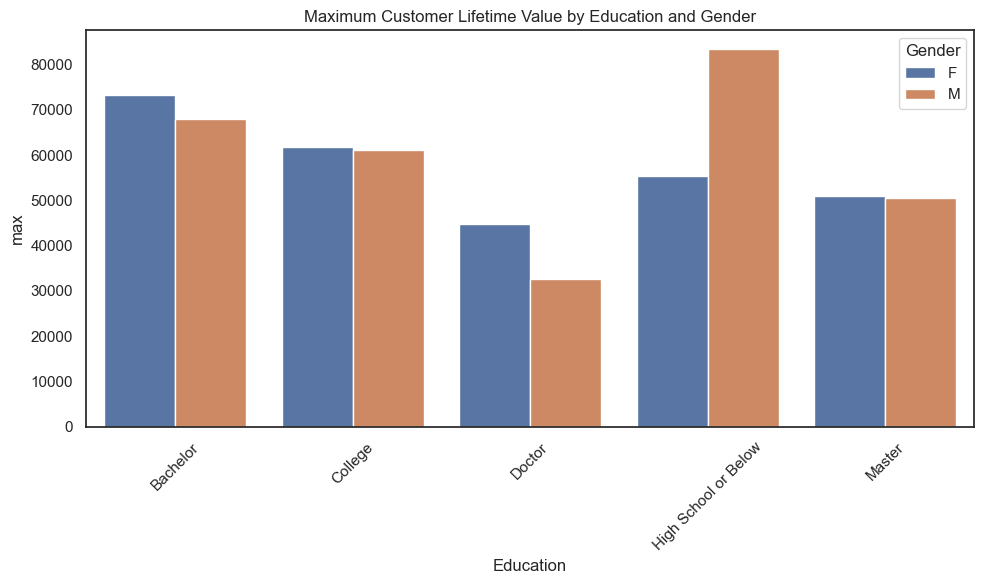

In [ ]:


sns.set(style="white")

# Plot 1: Max
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Education', y='max', hue='Gender')
plt.title('Maximum Customer Lifetime Value by Education and Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# the group of High School or Below Male shows unusually high max customer liftime value
# the group of Bachlor Female have highest max customer liftime value


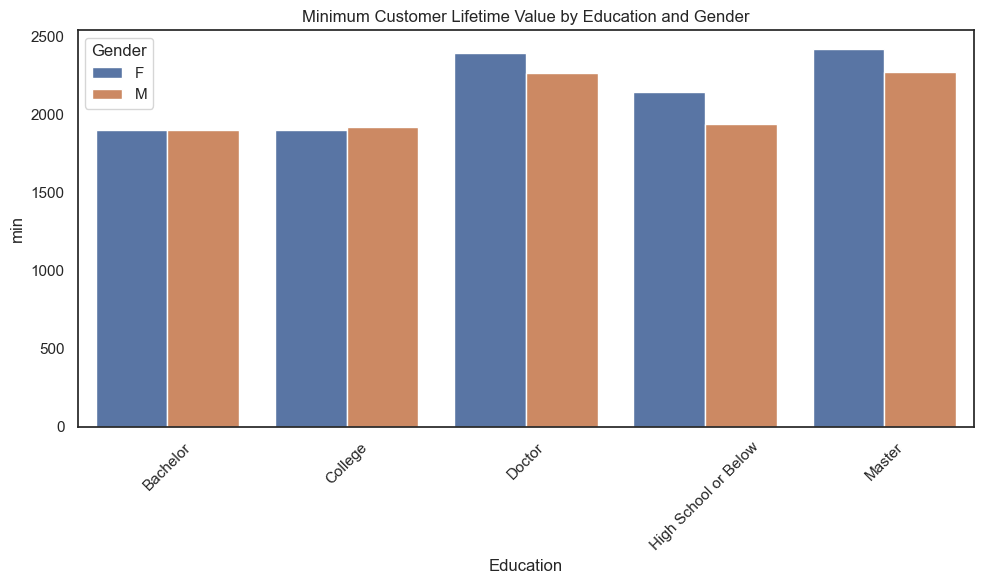

In [ ]:
# Plot 2: Min
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Education', y='min', hue='Gender')
plt.title('Minimum Customer Lifetime Value by Education and Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Min CLV is consistantly low (around 1900 - 2400) across all groups


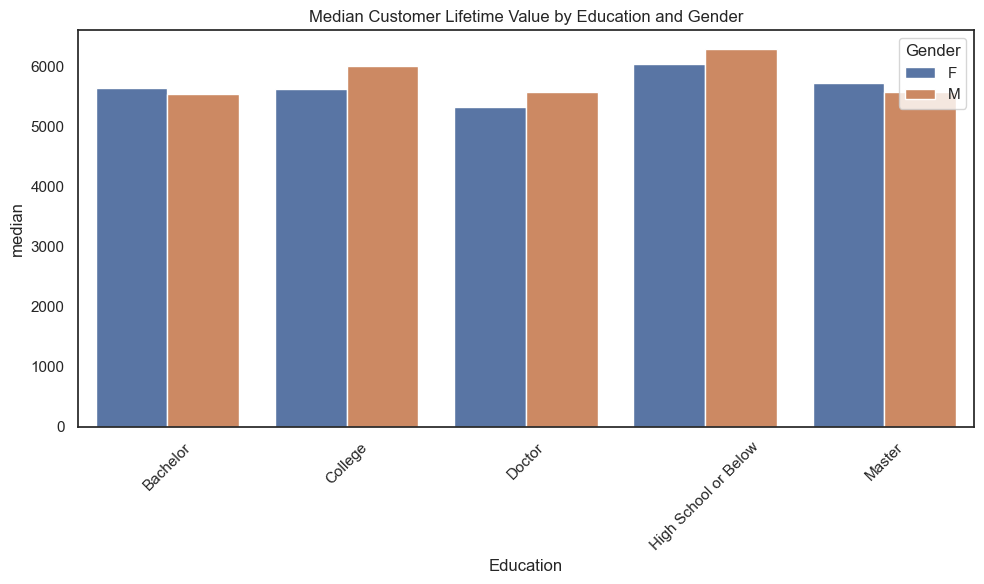

In [ ]:
# Plot 3: Median
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Education', y='median', hue='Gender')
plt.title('Median Customer Lifetime Value by Education and Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# the highest median CLV is found in Male with high school or below education 
# the lowest median CLV appears in Female doctor and male bachlor 

## Bonus

5. The marketing team wants to analyze the number of policies sold by state and month. Present the data in a table where the months are arranged as columns and the states are arranged as rows.

In [83]:
df['Effective To Date'] = pd.to_datetime(df['Effective To Date'],format = '%m%d%y')
df['Month'] = df['Effective To Date'].dt.month_name()
df['Month']

policy_df = df.pivot_table('Number of Policies',index='State',columns='Month',aggfunc='sum')
policy_df

Month,February,January
State,,
Arizona,2864,3052
California,4929,5673
Nevada,1278,1493
Oregon,3969,4697
Washington,1225,1358


6.  Display a new DataFrame that contains the number of policies sold by month, by state, for the top 3 states with the highest number of policies sold.

*Hint:*
- *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.*
- *Next, you will select the top 3 states with the highest number of policies sold.*
- *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*

In [91]:
policy_df['Total'] = policy_df['February'] + policy_df['January']
policy_df.sort_values(by=['Total'],ascending=False,inplace=True)
policy_df.head(3)

Month,February,January,Total
State,,,
California,4929,5673,10602
Oregon,3969,4697,8666
Arizona,2864,3052,5916


7. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.

Hint: You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

External Resources for Data Filtering: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

In [229]:
s1 = df[df['Response'] == 'Yes'].groupby('Sales Channel').size()
s2 = df.groupby('Sales Channel').size()

df_response = pd.concat([s1,s2],axis=1).reset_index()
df_response.rename(columns={0:'count_of_response',1:'count_of_total'},inplace=True)
df_response['response_ratio'] = (df_response['count_of_response']/df_response['count_of_total'])*100

df_response_long = pd.melt(df_response,id_vars='Sales Channel',value_vars=['count_of_response','count_of_total','response_ratio'],var_name='Measures')
df_response_long['value_formatted'] = df_response_long.apply(
    lambda row: f"{int(row['value'])}" if row['Measures'] in ['count_of_response', 'count_of_total']
    else f"{round(row['value'])}%",
    axis=1
)

df_response_long


,Sales Channel,Measures,value,value_formatted
0,Agent,count_of_response,742.000000,742
1,Branch,count_of_response,326.000000,326
2,Call Center,count_of_response,221.000000,221
3,Web,count_of_response,177.000000,177
4,Agent,count_of_total,4121.000000,4121
5,Branch,count_of_total,3022.000000,3022
6,Call Center,count_of_total,2141.000000,2141
7,Web,count_of_total,1626.000000,1626
8,Agent,response_ratio,18.005339,18%
9,Branch,response_ratio,10.787558,11%
